In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler

from scipy.stats import shapiro, probplot

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, recall_score, fbeta_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('input/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Skup podataka sastoji se od transakcija kreditnim karticama Europskih građana u rujnu 2013. godine. Sve transakcije u skupu podataka napravljene su unutar dva dana.

In [4]:
(df.isnull().sum() > 0).sum()

0

U skupu podataka nema nedostajućih podataka, tako da se ne treba baviti tehnikama nadopunjavanja takvih podataka.

In [5]:
df.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

Skup podataka koji se koristi sastoji se od 30 brojčanih varijabli. Kako bi se zaštitila privatnost korisnika kreditnih kartica, originalne značajke nisu dostupne u skupu podataka. Umjesto toga, 28 značajki dobiveno je pomoću analize glavnih komponenti (PCA). Značajke dobivene PCA-om su označene kao V1, V2, V3, ..., V28, dok su dvije značajke koje nisu transformirane PCA-om 'Time' i 'Amount'. Značajka 'Time' predstavlja vrijeme proteklo između svake transakcije i prve transakcije u skupu podataka, dok značajka 'Amount' predstavlja iznos koji je terećen s kartice. Konačno, binarna ciljna značajka 'Class' označava transakcije koje su prijevare (1) i transakcije koje nisu prijevare (0).

Broj transakcija: 284807
Broj transackija koje nisu lažne: 284315
Broj lažnih transakcija: 492

Udio transakcija:
    99.827 % transakcija koje nisu lažne
    0.173 % lažnih transakcija


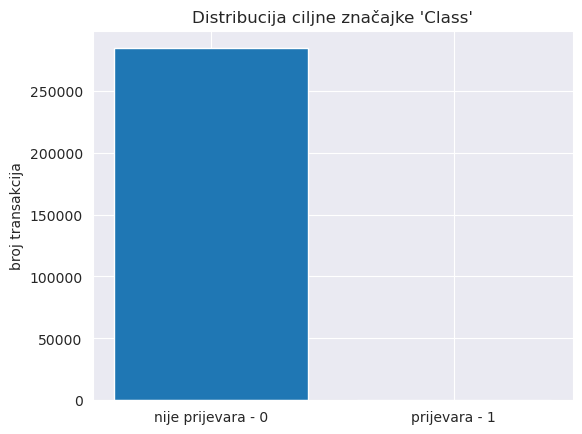

In [6]:
n_samples = len(df)
n_fraud_samples = df['Class'].sum()
n_non_fraud_samples = n_samples - n_fraud_samples
fraud_ratio = n_fraud_samples/n_samples
non_fraud_ratio = (n_samples-n_fraud_samples)/n_samples

print(f'Broj transakcija: {n_samples}')
print(f'Broj transackija koje nisu lažne: {n_non_fraud_samples}')
print(f'Broj lažnih transakcija: {n_fraud_samples}')
print(f'\nUdio transakcija:')
print(f'    {non_fraud_ratio * 100:.3f} % transakcija koje nisu lažne')
print(f'    {fraud_ratio * 100:.3f} % lažnih transakcija')

plt.bar(['nije prijevara - 0', 'prijevara - 1'], [n_non_fraud_samples, n_fraud_samples])
plt.title("Distribucija ciljne značajke 'Class'")
plt.ylabel('broj transakcija')
plt.subplots_adjust(left=0.15)
plt.savefig('distribucija_ciljne_znacajke_Class.png')
plt.show()

### Distribucija značajki

In [117]:
def plot_distribution(df, feature_name, split_by_class=False, title=None, ax=None):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    if split_by_class:
        sns.kdeplot(df[df['Class'] == 0][feature_name], fill=True, color='blue', ax=ax)
        sns.kdeplot(df[df['Class'] == 1][feature_name], fill=True, color='red', ax=ax)
        ax.legend(['Nije prijevara', 'Prijevara'])
    else:
        sns.kdeplot(df[feature_name], fill=True, color='green', ax=ax)
    ax.set_xlabel(feature_name, fontsize=12)
    ax.set_ylabel('gustoća', fontsize=12)
    if title is None:
        title = f"Distribucija '{feature_name}'"
    ax.set_title(title, fontsize=14)
    ax.set_xlim([df[feature_name].min(), df[feature_name].max()])
    plt.subplots_adjust(left=0.05, right=0.95)
    plt.savefig(f'distribucija_znacajke_{feature_name}{"_split_by_class" if split_by_class else ""}.png')
    if ax == None: plt.show()

#### Skaliranje značajki

In [118]:
scaler = RobustScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

KeyError: 'Amount'

In [ ]:
# postaviti 'Class' kao zadnji stupac
df = df[[col for col in df.columns if col != 'Class'] + ['Class']]

Značajke ćemo skalirati kako bi imale sličnu skalu podataka. To može pomoći performansama algoritama strojnog učenja, kao i smanjiti utjecaj stršećih vrijednosti.

Podaci V1-V28 su unaprijed skalirani, dok ćemo retke 'Amount' i 'Time' skalirati. Za skaliranje koristimo RobustScaler transformaciju iz paketa Sklearn. Novi retci su naziva 'Amount_scaled' i 'Time_scaled'. RobustScaler skalira podatke koristeći interkvartalni raspon IQR koji se dobiva kao razlika 75-tog i 25-tog percentila podataka. Medijan se oduzima od svih podataka i rezultat se dijeli sa izračunatim interkvartalnim rasponom. Podaci će imati medijan 0 i raspršenje slično kao originalni podaci. Ova metoda je dobra jer je robusna na stršeće vrijednosti.

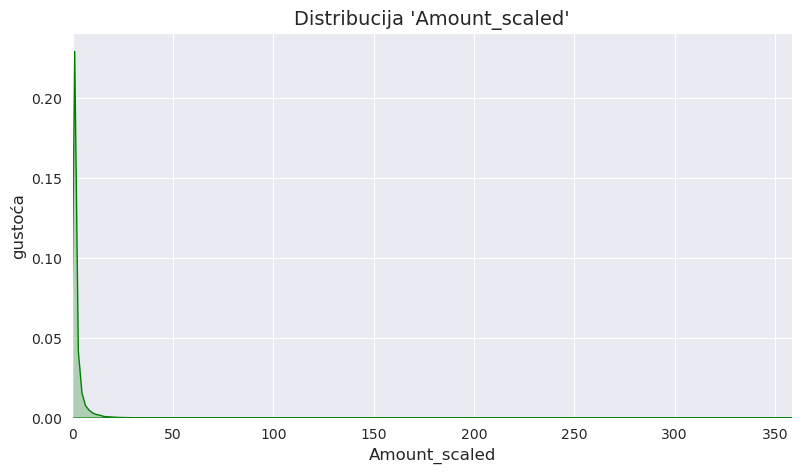

In [119]:
plot_distribution(df, 'Amount_scaled', split_by_class=False)

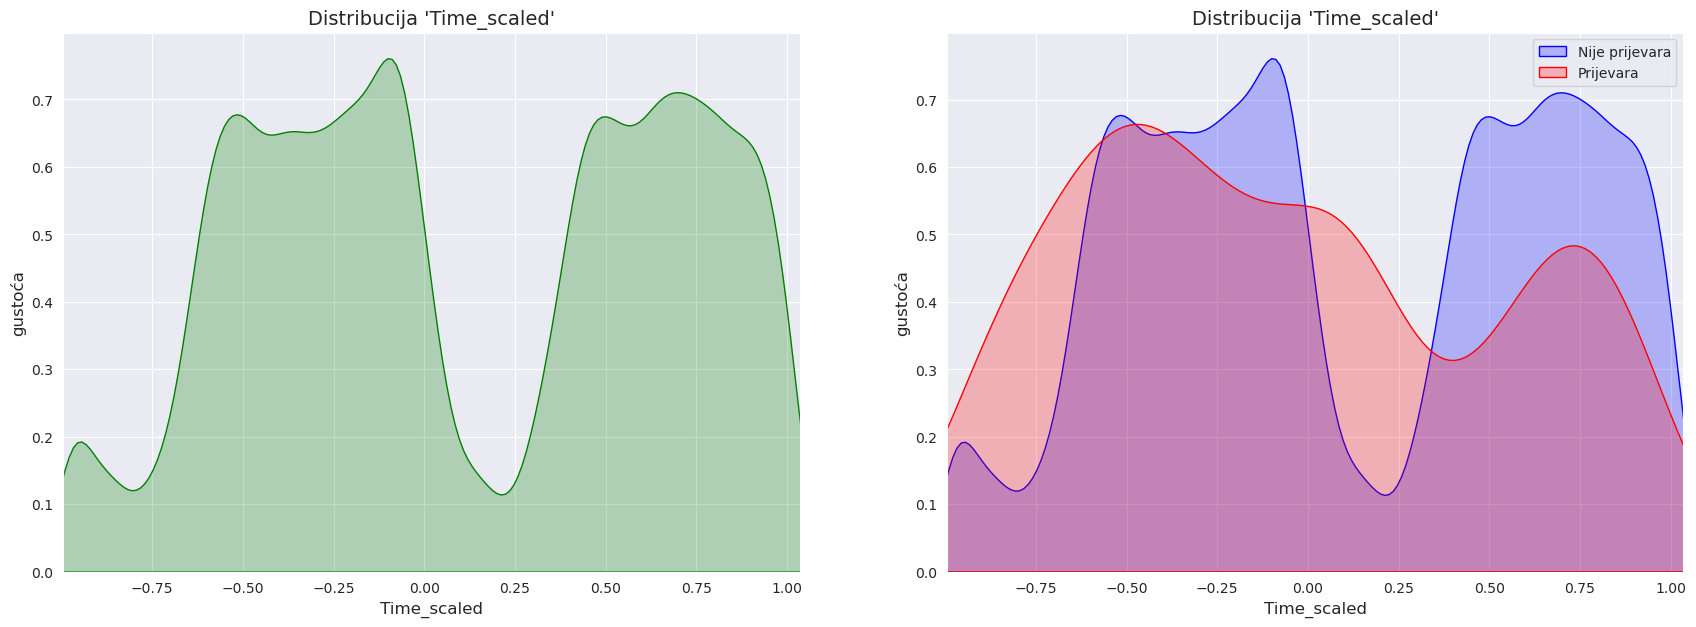

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
plot_distribution(df, 'Time_scaled', split_by_class=False, ax=ax[0])
plot_distribution(df, 'Time_scaled', split_by_class=True, ax=ax[1])

Distribucija značajke 'Time' prije i nakon skaliranja. Izgled se može opisati činjenicom da su podaci skupljeni tijekom 2 dana i mjerenje počinje od ponoći. Vidi se da je većina transakcija obavljena preko dana, dok je broj transakcija značajno smanjen tijekom noći.

In [121]:
def drop_columns_if_exist(df, columns):
    for column in columns:
        if column in df.columns:
            df.drop(column, axis=1, inplace=True)

In [122]:
drop_columns_if_exist(df, ['Time', 'Amount'])

Nakon skaliranja, stare retke 'Amount' i 'Time' izbacujemo iz podatkovnog skupa.

In [123]:
n_rows = 7
n_cols = 4
if False:
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
    fig.suptitle('Distribucija značajki V1-V28', fontsize=20)
    plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.92, wspace=0.2, hspace=0.4)

    for row in range(n_rows):
        for col in range(n_cols):
            feature_name = f'V{n_cols*row + col + 1}'
            sns.kdeplot(df[feature_name], ax=ax[row, col])
            if col == 0:
                ax[row, col].set_ylabel('gustoća')
            else:
                ax[row, col].set_ylabel('')

    plt.subplots_adjust(wspace=0.05, left=0.05, right=0.95)
    plt.savefig('distribucija_znacajki_V1_V28.png')
    plt.show()

#### Matrica korelacije

In [125]:
def plot_correlation_heatmap(df, lower_triangular=True, ax=None):
    if ax == None:
        fig, ax = plt.subplots()
    df_corr = df.corr()
    mask = np.triu(np.ones_like(df_corr)) if lower_triangular else np.ones_like(df_corr)
    sns.heatmap(df_corr, xticklabels=True, yticklabels=True, vmin=-1, vmax=1, center=0.0, mask=mask, ax=ax, cmap='coolwarm')
    if ax == None:
        plt.show()

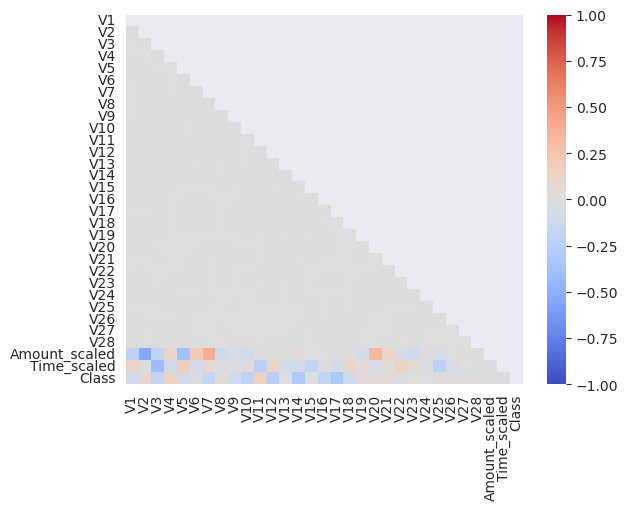

In [126]:
plot_correlation_heatmap(df)


### Uzorkovanje podataka

In [156]:
def df_to_X_y(df):
    X = df.drop('Class', axis=1).values
    y = df.Class.values
    return X, y


def X_y_to_df(X, y, columns=df.columns):
    X_df = pd.DataFrame(X, columns=columns[:-1])
    y_df = pd.DataFrame(y, columns=[columns[-1]])
    return pd.concat([X_df, y_df], axis=1)


# poduzorkovanje pomoću paketa RandomUnderSampler
def random_undersample(df, random_state=42):
    X, y = df_to_X_y(df)

    undersampler = RandomUnderSampler(random_state=random_state)
    X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
    df_undersampled = X_y_to_df(X_undersampled, y_undersampled)
    return df_undersampled


# naduzorkovanje pomoću SMOTE algoritma i paketa imblearn (imbalanced learn)
def smote_oversampling(df, random_state=42, cutout_limit=0):
    if cutout_limit > 0:
        df = cut_majority_class(df, cutout_limit=cutout_limit)

    X, y = df_to_X_y(df)

    smote = SMOTE(random_state=random_state)
    X_oversampled, y_oversampled = smote.fit_resample(X, y)
    df_oversampled = X_y_to_df(X_oversampled, y_oversampled)
    return df_oversampled


def cut_majority_class(df, random_state=42, cutout_limit=0):
    if cutout_limit <= 0:
        return df

    df_class_0 = df[df.Class==0]
    df_class_1 = df[df.Class==1]

    sampled_df = pd.concat([df_class_0.sample(n=cutout_limit, random_state=random_state), df_class_1])

    return sampled_df


df_undersampled = random_undersample(df)
df_original = cut_majority_class(df, cutout_limit=0)
df_oversampled = smote_oversampling(df, cutout_limit=0)

In [157]:
print("Broj podataka s obzirom na ciljnu vrijednost 'Class'")
print(f'originalni skup:\n{df_original.Class.value_counts()}')
print(f'poduzorkovani skup:\n{df_undersampled.Class.value_counts()}')
print(f'naduzorkovani skup:\n{df_oversampled.Class.value_counts()}')

Broj podataka s obzirom na ciljnu vrijednost 'Class'
originalni skup:
0    284315
1       492
Name: Class, dtype: int64
poduzorkovani skup:
0    492
1    492
Name: Class, dtype: int64
naduzorkovani skup:
0    284315
1    284315
Name: Class, dtype: int64


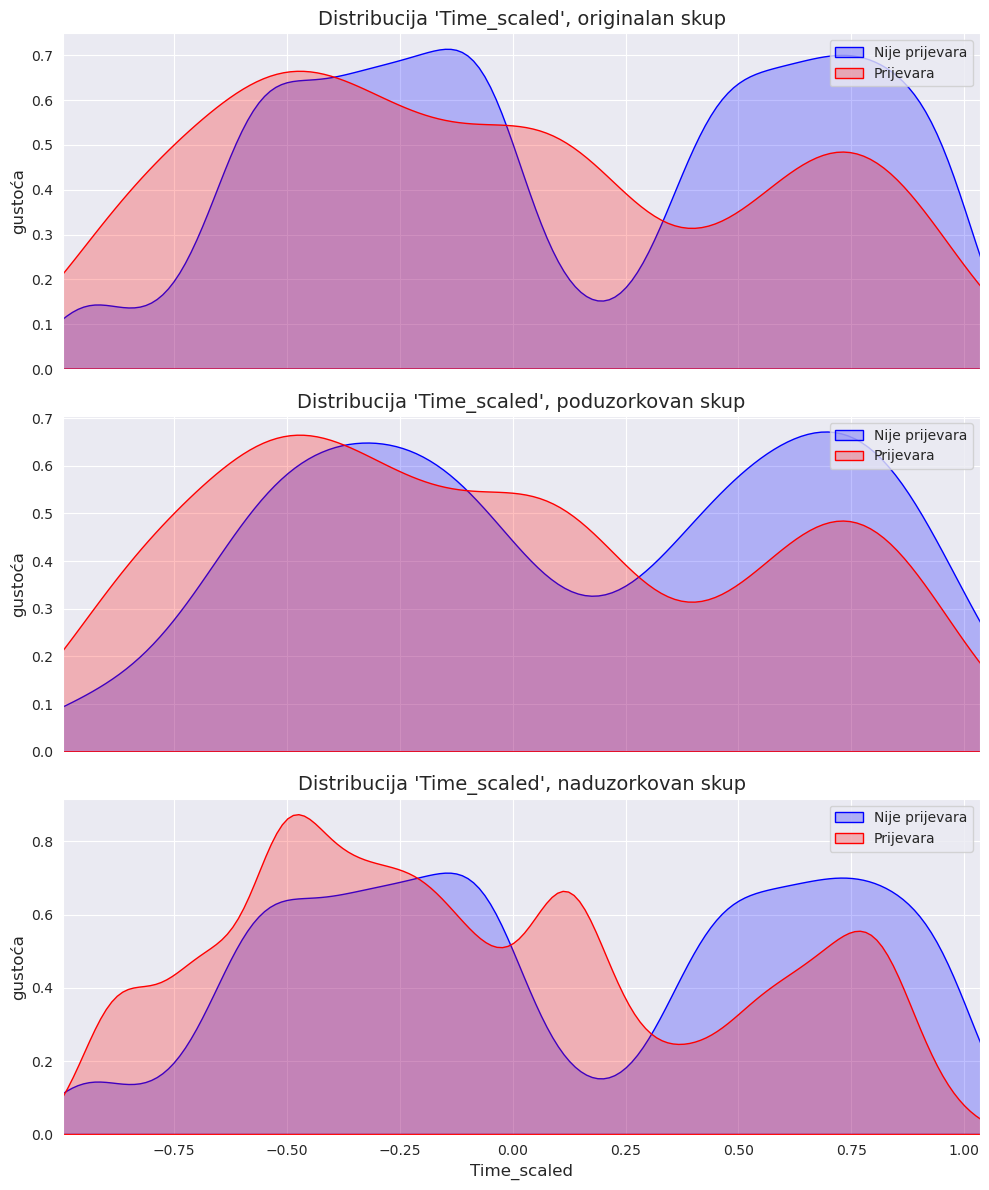

In [129]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
df_i = {'originalan skup': df_original, 'poduzorkovan skup': df_undersampled, 'naduzorkovan skup': df_oversampled}

for i, (df_label, df_i) in enumerate(df_i.items()):
    plot_distribution(df_i, 'Time_scaled', split_by_class=True, ax=ax[i], title=f"Distribucija 'Time_scaled', {df_label}")
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.tight_layout()
plt.savefig('usporedba_distribucije_time_scaled_originalan_poduzorkovan_i_naduzorkovan_skup.png')
plt.show()

Na grafu je prikazana usporedba distribucija značajke 'Time_scaled' u originalnom, poduzorkovanom i naduzorkovanom skupu. U poduzorkovanom skupu su izbačene transakcije koje nisu prijevare, što je rezultiralo blagom promjenom distribucije negativne klase. Zanimljiva je i distribucija prijevara u naduzorkovanom skupu, gdje su sintetički dodani pozitivni primjeri, što se može primijetiti po promjeni distribucije pozitivne klase.

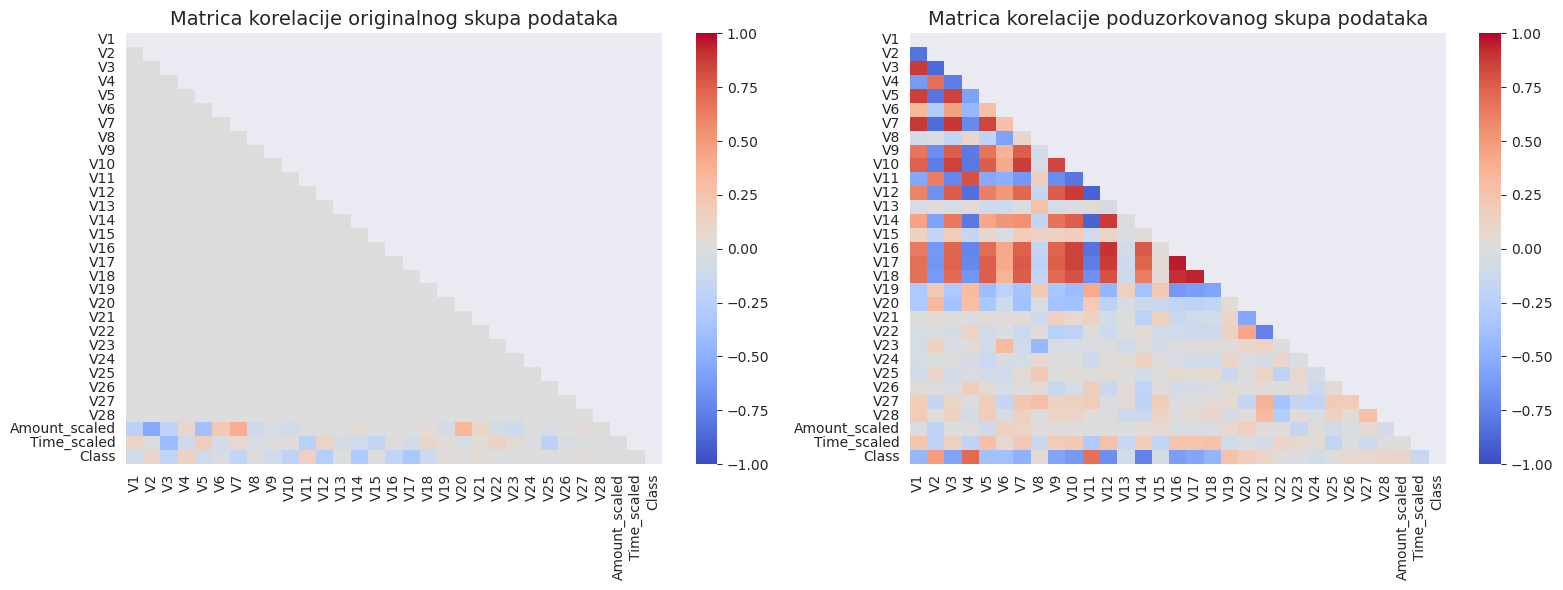

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_correlation_heatmap(df, ax=ax[0])
plot_correlation_heatmap(df_undersampled, ax=ax[1])
ax[0].set_title('Matrica korelacije originalnog skupa podataka', fontsize=14)
ax[1].set_title('Matrica korelacije poduzorkovanog skupa podataka', fontsize=14)
plt.subplots_adjust(left=0.10, right=0.95)
plt.tight_layout()
plt.savefig(f'usporedba_matrica_korelacija.png')
plt.show()

Korištenjem korelacijske matrice možemo prikazati linearnu povezanost između parova varijabli u skupu podataka. Na slici {dodaj sliku} možemo vidjeti dvije korelacijske matrice. Lijeva matrica prikazuje korelacije originalnog skupa podataka, dok desna matrica prikazuje korelacije poduzorkovanog skupa podataka koji sadrži jednak broj primjera prijevara i primjera koji nisu prijevare. U originalnom skupu, vrijednosti korelacije su većinom blizu nule, što je rezultat neravnoteže između klasa primjera. Korelacijska matrica dobivena iz poduzorkovanog skupa podataka pruža jasniji uvid u međuovisnost varijabli.

Najzanimljivije su nam vrijednosti korelacije između ciljne varijable 'Class' i ostalih varijabli, jer one pokazuju koliko ciljna varijabla 'Class' ovisi o pojedinim varijablama. Varijable V10, V12 i V14 imaju najvišu negativnu korelaciju, dok varijable V2, V4 i V11 imaju najvišu pozitivnu korelaciju s ciljnom varijablom 'Class'. Što su niže vrijednosti varijabli V10, V12, V14 i što su više vrijednosti varijabli V2, V4 i V11, veća je vjerojatnost da će primjer biti lažna transakcija.

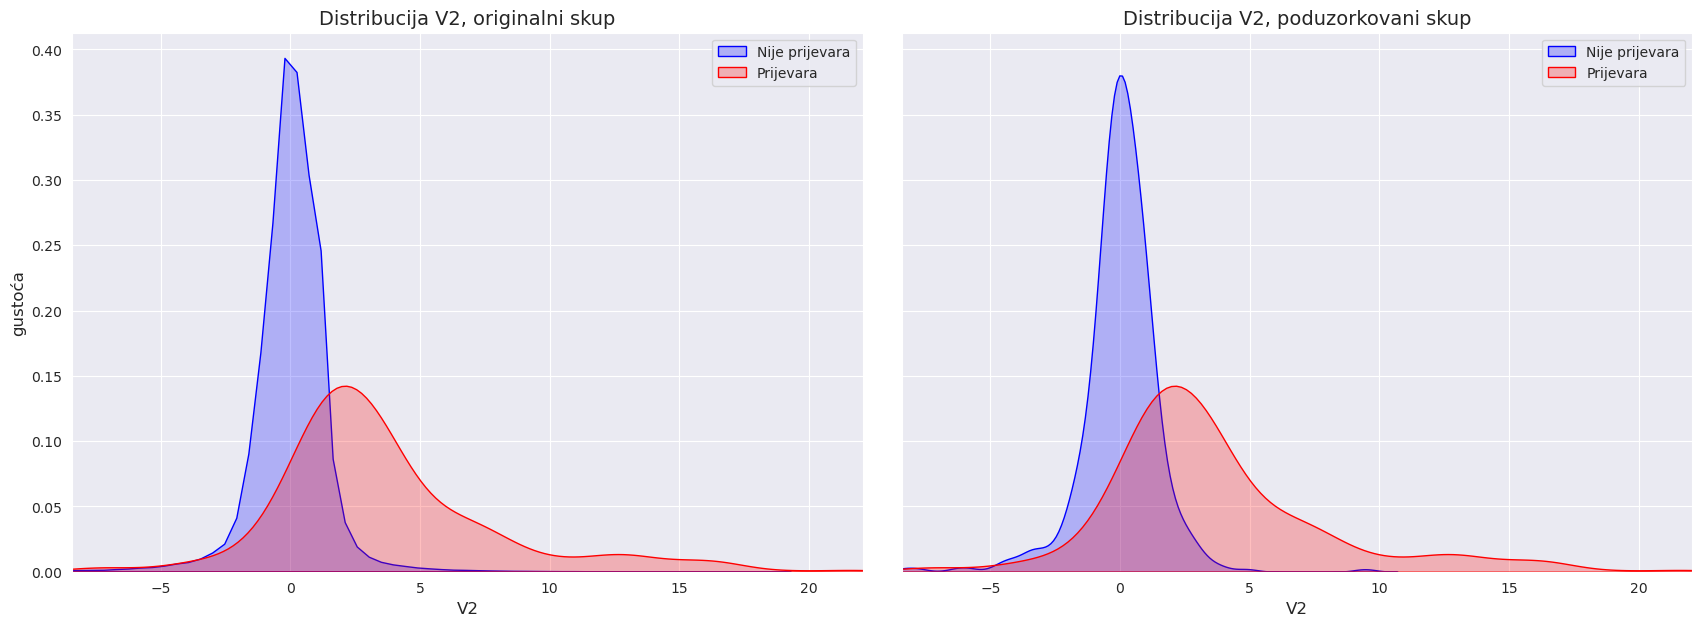

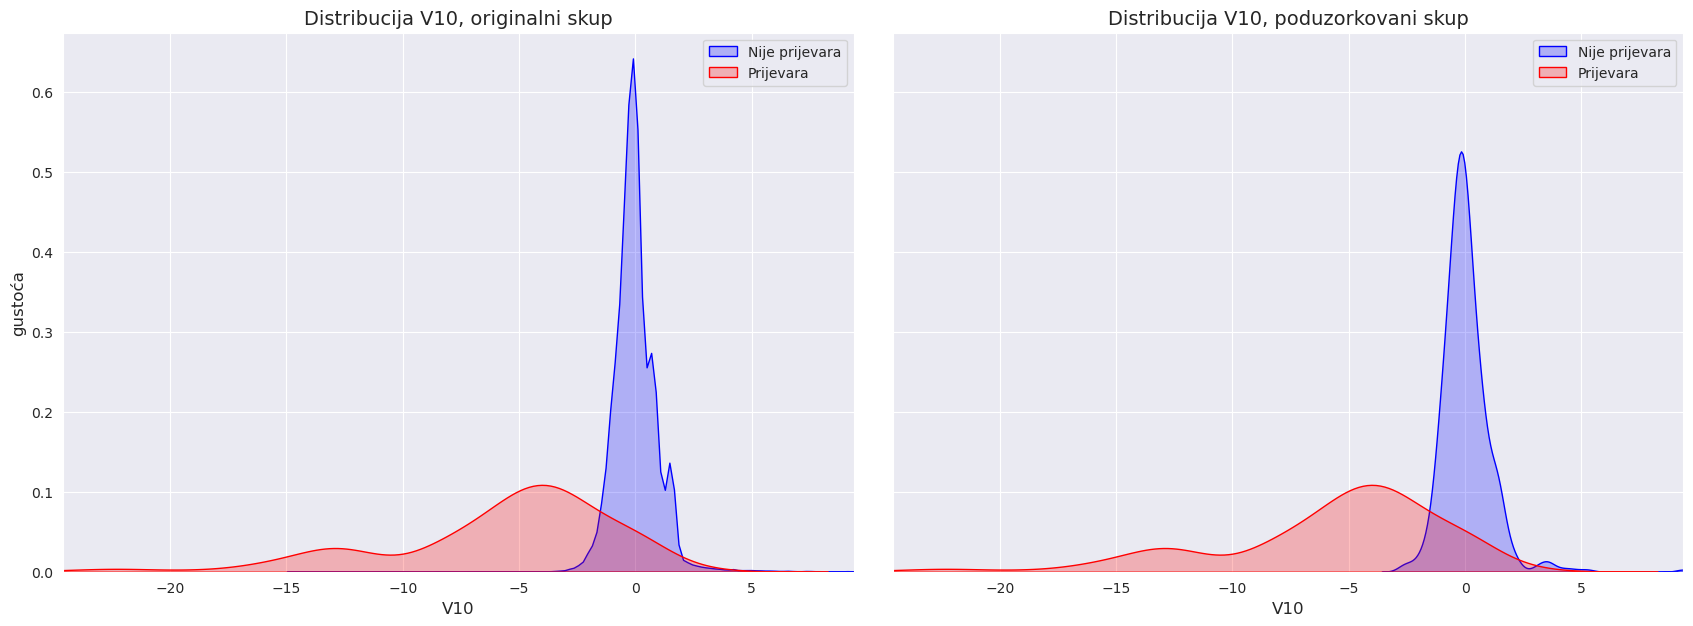

In [132]:
def compare_feature_distribution_normal_and_undersampled(df, df_undersampled, feature_name):
    split_by_class = True
    fig, ax = plt.subplots(1, 2, figsize=(18, 7), sharex=True, sharey=True)
    plot_distribution(df, feature_name, split_by_class=split_by_class, ax=ax[0])
    ax[0].set_title(f'Distribucija {feature_name}, originalni skup', fontsize=14)
    plot_distribution(df_undersampled, feature_name, split_by_class=split_by_class, ax=ax[1])
    ax[1].set_title(f'Distribucija {feature_name}, poduzorkovani skup', fontsize=14)
    plt.subplots_adjust(wspace=0.05, left=0.05, right=0.95)
    fig.savefig(f'compare_feature_{feature_name}_normal_and_undersampled.png')
    plt.show()


if True:
    compare_feature_distribution_normal_and_undersampled(df, df_undersampled, 'V2')
    compare_feature_distribution_normal_and_undersampled(df, df_undersampled, 'V10')
else:
    fig, ax = plt.subplots(figsize=(6, 6))
    plot_distribution(df, 'V2', split_by_class=True, ax=ax)
    plt.tight_layout()
    plt.savefig(f'V2_original_skup.png')
    plt.show()

    fig, ax = plt.subplots(figsize=(6, 6))
    plot_distribution(df, 'V10', split_by_class=True, ax=ax)
    plt.tight_layout()
    plt.savefig(f'V10_original_skup.png')
    plt.show()

Grafovi {ubaci referencu} prikazuju distribucije varijabli V2 i V10 u originalnom i poduzorkovanom skupu podataka. Tijekom poduzorkovanja, ne uklanjamo primjere koji predstavljaju prijevaru, pa distribucija pozitivne klase ostaje jednaka u oba skupa. Međutim, uklanjamo primjere negativne klase. Distribucija primjera pozitivne klase nije znatno različita u oba slučaja.

Utvrdili smo da varijabla V2 ima najveću pozitivnu, a V10 najveću negativnu korelaciju s ciljnom varijablom. To se može vidjeti na grafikonima distribucija. Kod varijable V2, središte distribucije pozitivnih primjera smješteno je desno od središta distribucije negativnih primjera, što ukazuje na pozitivnu korelaciju. S druge strane, kod varijable V10 situacija je obrnuta. Središte distribucije pozitivnih primjera nalazi se lijevo od središta distribucije negativnih primjera, što odgovara negativnoj korelaciji.

#### Redukcija dimenzionalnosti i grupiranje

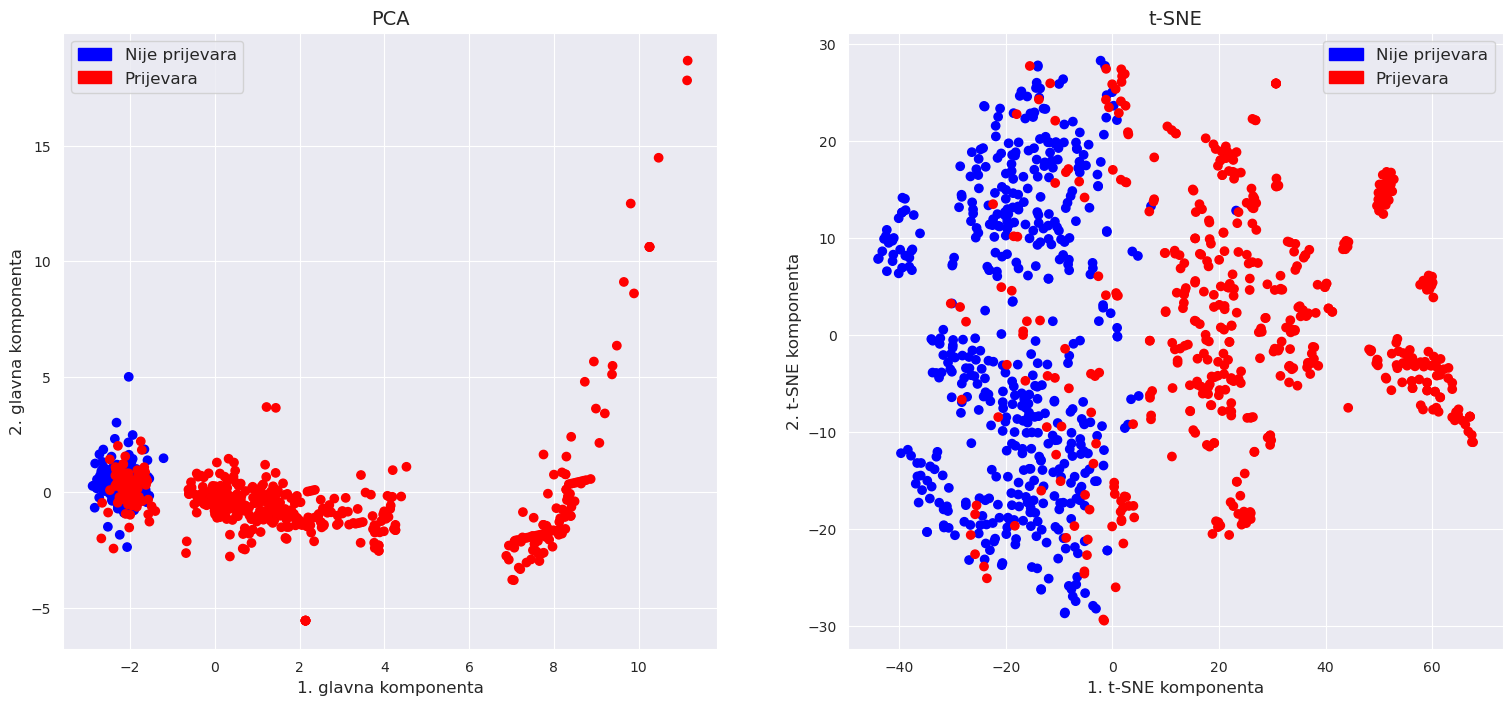

In [106]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches



def plot_PCA_and_TSNE(df):
    X = df.drop('Class', axis=1)
    y = df.Class

    # podaci su već skalirani, osim ako je poduzorkovani dataset
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)

    df_pca_tsne = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    df_pca_tsne['TSNE1'] = X_tsne[:, 0]
    df_pca_tsne['TSNE2'] = X_tsne[:, 1]
    df_pca_tsne['Class'] = y

    cmap = ListedColormap(['blue', 'red'])
    labels = [0, 1]

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    scatter_pca = ax[0].scatter(df_pca_tsne.PC1, df_pca_tsne.PC2, c=df_pca_tsne.Class, cmap=cmap)
    ax[0].set_xlabel('1. glavna komponenta', fontsize=12)
    ax[0].set_ylabel('2. glavna komponenta', fontsize=12)
    ax[0].set_title('PCA', fontsize=14)

    scatter_tsne = ax[1].scatter(df_pca_tsne.TSNE1, df_pca_tsne.TSNE2, c=df_pca_tsne.Class, cmap=cmap)
    ax[1].set_xlabel('1. t-SNE komponenta', fontsize=12)
    ax[1].set_ylabel('2. t-SNE komponenta', fontsize=12)
    ax[1].set_title('t-SNE', fontsize=14)

    legend_elements = [mpatches.Circle((0.5, 0.5), radius=0.1, color='blue', label='Nije prijevara'), mpatches.Circle((0.5, 0.5), radius=0.1, color='red', label='Prijevara')]
    ax[0].legend(handles=legend_elements, fontsize=12)
    ax[1].legend(handles=legend_elements, fontsize=12)

    ax[0].tick_params(axis='both', which='both', labelsize=10, size=5)
    ax[1].tick_params(axis='both', which='both', labelsize=10, size=5)

    plt.subplots_adjust(left=0.05, right=0.95)
    plt.savefig('pca_i_tsne_grupiranje.png')
    plt.show()


df_undersampled = random_undersample(df, random_state=0)
plot_PCA_and_TSNE(df_undersampled)

Radi vizualizacije transakcija koje predstavljaju prijevare i onih koje to nisu, izvedene su analiza glavnih komponenti (PCA) i algoritam t-SNE (t-distributed stochastic neighbor embedding) \cite{tsne_algorithm}. Broj komponenti postavljen je na 2 kako bi se podaci mogli prikazati pomoću grafa raspršenja. PCA je algoritam koji traži komponente tako da prva komponenta redom objašnjava što je moguće više varijance, dok druga komponenta objašnjava što više preostale varijance. T-SNE je nelinearni algoritam za smanjenje dimenzionalnosti i vizualizaciju podataka visokih dimenzija. Posebno je koristan za vizualizaciju kompleksnih podataka koji se ne mogu jednostavno prikazati pomoću linearnih metoda kao što je PCA.

U obje vizualizacije možemo vidjeti grupe transakcija koje su prijevare i onih koje nisu. Međutim, t-SNE se pokazuje boljim jer bolje razdvaja podatke, dok kod PCA vizualizacije, u grupi transakcija koje nisu prijevare, možemo pronaći i primjere koji su prijevare.

#### Splitting data into train and test set

In [195]:
from itertools import product
from sklearn.model_selection import RepeatedStratifiedKFold


def get_param_combinations(param_grid):
    keys, values = zip(*param_grid.items())
    combinations = list(product(*values))
    return [dict(zip(keys, comb)) for comb in combinations]


def sample_df(df, sampling, random_state=42, cutout_limit=0):
    if sampling == 'originalan skup':
        df = cut_majority_class(df, random_state=random_state, cutout_limit=cutout_limit)
    elif sampling == 'poduzorkovan skup':
        df = random_undersample(df, random_state=random_state)
    elif sampling == 'naduzorkovan skup':
        df = smote_oversampling(df, random_state=random_state, cutout_limit=cutout_limit)
    else:
        raise ValueError(f'Argument "sampling", tj. tip uzorkovanja mora biti jedan od vrijednosti: "poduzorkovan skup", "originalan skup", "naduzorkovan skup". Uneseni argument je: {sampling}')

    return df


def cross_validation_and_hyperparameter_tuning(model, param_grid, sampling='originalan skup', df=df, cutout_limit=0, outer_folds=5, inner_folds=3, scoring='f1_macro', verbose=0, n_jobs=-1, random_state=42):

    X, y = df_to_X_y(df)

    # TODO check this
    outer_cv = StratifiedKFold(n_splits=outer_folds, random_state=42, shuffle=True)
    inner_cv = StratifiedKFold(n_splits=inner_folds, random_state=42, shuffle=True)
    #outer_cv = RepeatedStratifiedKFold(n_splits=outer_folds, n_repeats=1, random_state=42)
    #inner_cv = RepeatedStratifiedKFold(n_splits=inner_folds, n_repeats=1, random_state=42)

    outer_test_scores = []
    best_models = []

    param_combinations = get_param_combinations(param_grid)

    for outer_fold_i, (train_index, test_index) in enumerate(outer_cv.split(X, y)):
        print(f'\nOuter fold {outer_fold_i+1}')

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        best_inner_score = -np.inf
        best_params = None
        for params in param_combinations:
            model.set_params(**params)
            inner_scores = []
            for inner_train_index, inner_validation_index in inner_cv.split(X_train, y_train):
                X_inner_train, X_validation = X_train[inner_train_index], X_train[inner_validation_index]
                y_inner_train, y_validation = y_train[inner_train_index], y_train[inner_validation_index]

                df_inner_train = X_y_to_df(X_inner_train, y_inner_train)
                df_inner_train = sample_df(df_inner_train, sampling, random_state=random_state, cutout_limit=cutout_limit)
                X_inner_train, y_inner_train = df_to_X_y(df_inner_train)

                model.fit(X_inner_train, y_inner_train)
                y_validation_predicted = model.predict(X_validation)
                inner_evaluation_score = f1_score(y_validation, y_validation_predicted, average='macro')
                inner_scores.append(inner_evaluation_score)

            average_inner_score = np.mean(inner_scores)
            if average_inner_score > best_inner_score:
                best_inner_score = average_inner_score
                best_params = params

        df_train = X_y_to_df(X_train, y_train)
        df_train = sample_df(df_train, sampling, random_state=random_state, cutout_limit=cutout_limit)
        X_train, y_train = df_to_X_y(df_train)
        model.set_params(**best_params)
        model.fit(X_train, y_train)
        best_models.append(model)

        y_pred = model.predict(X_test)
        print(f'precision: {sum(precision_score(y_test, y_pred, average=None)) / 2:.3f}')
        print(f'recall: {sum(recall_score(y_test, y_pred, average=None)) / 2:.3f}')
        evaluation_score = f1_score(y_test, y_pred, average='macro')
        outer_test_scores.append(evaluation_score)

    average_outer_test_score = np.mean(outer_test_scores)

    print(f'\nModel {model.__class__.__name__}, {sampling}')
    print(f'F1 macro k fold scores:\n{[round(x, 3) for x in outer_test_scores]}')
    print(f'Average F1 macro score:\n{average_outer_test_score:.3f}')

    return best_models[np.argmax(outer_test_scores)]

In [171]:
sampling_type = ['poduzorkovan skup', 'originalan skup', 'naduzorkovan skup']

In [194]:
best_logreg_models = []

for df_type in sampling_type:
    print(df_type)
    print('='*100)
    model = LogisticRegression(random_state=42, max_iter=100000, solver='liblinear')
    param_grid = {'penalty': ['l2'], 'C': [0.0001, 0.1, 10, 1000]}
    best_logreg_model = cross_validation_and_hyperparameter_tuning(model, param_grid, sampling=df_type)
    best_logreg_models.append(best_logreg_model)
    print(f'\nBest model parameters:\n{best_logreg_model.get_params()}\n\n')

poduzorkovan skup

Outer fold 1
precision: 0.525
recall: 0.930

Outer fold 2
precision: 0.531
recall: 0.957

Outer fold 3
precision: 0.529
recall: 0.947

Outer fold 4
precision: 0.523
recall: 0.943

Outer fold 5
precision: 0.521
recall: 0.916

Model LogisticRegression, poduzorkovan skup
F1 macro k fold scores:
[0.54, 0.551, 0.549, 0.536, 0.531]
Average F1 macro score:
0.541

Best model parameters:
{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


originalan skup

Outer fold 1
precision: 0.858
recall: 0.894

Outer fold 2
precision: 0.896
recall: 0.924

Outer fold 3
precision: 0.886
recall: 0.913

Outer fold 4
precision: 0.874
recall: 0.893

Outer fold 5
precision: 0.866
recall: 0.918

Model LogisticRegression, originalan skup
F1 macro k fold scores:
[0.875,

In [192]:
best_randomforest_models = []

for df_type in sampling_type:
    print(df_type)
    print('='*100)
    model = RandomForestClassifier(random_state=42)
    param_grid = {'n_estimators': [10, 100, 200], 'max_depth': [5, 10]}
    best_randomforest_model = cross_validation_and_hyperparameter_tuning(model, param_grid, sampling=df_type)
    best_randomforest_models.append(best_logreg_model)
    print(f'\nBest model parameters:\n{best_randomforest_model.get_params()}\n\n')

poduzorkovan skup

Outer fold 1
precision: 0.540
recall: 0.931

Outer fold 2
precision: 0.574
recall: 0.955

Outer fold 3
precision: 0.562
recall: 0.938

Outer fold 4
precision: 0.546
recall: 0.946

Outer fold 5
precision: 0.542
recall: 0.921

Model RandomForestClassifier, poduzorkovan skup
F1 macro k fold scores:
[0.569, 0.625, 0.606, 0.58, 0.573]
Average F1 macro score:
0.591

Best model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


originalan skup

Outer fold 1
precision: 0.874
recall: 0.904

Outer fold 2
precision: 0.912
recall: 0.924

Outer fold 3
precision: 0.894
recall: 0.918

Outer fold 4
precision: 0.893
recall: 0.913

Outer fo

In [184]:
best_svm_models = []

for df_type in sampling_type:
    print(df_type)
    print('='*100)
    model = SVC(random_state=42)
    param_grid = {'C': [0.1, 1, 10, 1000], 'kernel': ['rbf'], 'gamma': ['scale']}
    best_svm_model = cross_validation_and_hyperparameter_tuning(model, param_grid, sampling=df_type)
    best_svm_models.append(best_svm_model)
    print(f'\nBest model parameters:\n{best_svm_model.get_params()}\n\n')

poduzorkovan skup

Outer fold 1
precision: 0.525
recall: 0.935

Outer fold 2
precision: 0.548
recall: 0.952

Outer fold 3
precision: 0.541
recall: 0.945

Outer fold 4
precision: 0.536
recall: 0.949

Outer fold 5
precision: 0.532
recall: 0.933

Model SVC, poduzorkovan skup
F1 macro k fold scores:
[0.541, 0.583, 0.57, 0.562, 0.555]
Average F1 macro score:
0.562

Best model parameters:
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


originalan skup

Outer fold 1
precision: 0.773
recall: 0.914

Outer fold 2
precision: 0.792
recall: 0.934

Outer fold 3
precision: 0.762
recall: 0.938

Outer fold 4
precision: 0.688
recall: 0.938

Outer fold 5
precision: 0.719
recall: 0.912

Model SVC, originalan skup
F1 macro k fold scores:
[0.829, 0.849, 0.828, 0.763, 0.786]
Averag